# EA Assignment 01 - Data Exploration
__Authored by: Álvaro Bartolomé del Canto (alvarobartt @ GitHub)__

---

<img src="https://media-exp1.licdn.com/dms/image/C561BAQFjp6F5hjzDhg/company-background_10000/0?e=2159024400&v=beta&t=OfpXJFCHCqdhcTu7Ud-lediwihm0cANad1Kc_8JcMpA">

## Loading Data

Since we already downloaded the data from the provided URL by Francisco Martinez (EA Talent Coordinator) available at: https://www.dropbox.com/s/le9j5whzv3zzgrw/documents_challenge.zip?dl=0, we now will proceed with the data loading.

Since the `documents_challenge/` directory contains one subdirectory per context and then, those subdirectories contain nested subdirectories which stand for the language of the texts inside them, so that the directories structure is as it follows: `documents_challenge/{CONTEXT}/{LANGUAGE}/*.txt`, where the .txt files are.

We will be using `glob` to list the nested directories and files from the specified directory, since it allows to list directories and files using regular expressions and so on, which may helps us while listing the available data before downloading it.

In [ ]:
import glob

In [2]:
directories = glob.glob('../documents_challenge/*')
directories

['../documents_challenge/Wikipedia',
 '../documents_challenge/Conference_papers',
 '../documents_challenge/APR',
 '../documents_challenge/PAN11']

Once we list the context/categories available inside the `documents_challenge/` directory, we can proceed to list the nested directories and files so as to load the files while tagging them with both the language in which files are written and the context/category that files come from.

In [3]:
data = list()

In [4]:
%%time

for directory in directories:
    context = directory.split('/')[-1].lower()
    
    for subdir in glob.glob(f"{directory}/*"):
        lang = subdir.split('/')[-1].lower()
        
        for file in glob.glob(f"{subdir}/*"):
            data.append({
                'lang': lang,
                'context': context,
                'text': open(file, 'r').read()
            })

CPU times: user 396 ms, sys: 128 ms, total: 524 ms
Wall time: 526 ms


After loading the data into a list of Python dictionaries with the keys: `lang`, `context` and `text`, we will transform it into a `pandas.DataFrame` which is a structure that will ease the task of data analysis.

__Note__: as already stated in `00 - Project Definition.ipynb`, on later Jupyter Notebooks whenever the NLP preprocessing pipeline is developed, the documents will be preprocessed on the fly so as to avoid unnecessary loops over the data.

In [5]:
import pandas as pd

data = pd.DataFrame(data)
data.head()

,lang,context,text
0,en,wikipedia,Watchmen is a twelve-issue comic book limite...
1,en,wikipedia,The Citigroup Center (formerly Citicorp Cente...
2,en,wikipedia,| birth_place = | death_date = | death_place ...
3,en,wikipedia,"Marbod or Maroboduus (born c. in 30 BC, died ..."
4,en,wikipedia,The Sylvester Medal is a bronze medal awarded ...


---

## Overviewing Data

Once we loaded and transformed the data into a `pandas.DataFrame`, we will be performing a simple overview analysis so as to identify if there is any null value, the memory usage of the data strcture, the main data types, some categorical analysis and so on, so as to initially clean the dataset if possible and then proceed with the data analysis in detail. 

In [6]:
data.head()

,lang,context,text
0,en,wikipedia,Watchmen is a twelve-issue comic book limite...
1,en,wikipedia,The Citigroup Center (formerly Citicorp Cente...
2,en,wikipedia,| birth_place = | death_date = | death_place ...
3,en,wikipedia,"Marbod or Maroboduus (born c. in 30 BC, died ..."
4,en,wikipedia,The Sylvester Medal is a bronze medal awarded ...


In [7]:
f"We have a pandas.DataFrame of {data.shape[0]} rows, where each row contains {data.shape[1]} \
columns which are indeed the [{','.join(data.columns.tolist())}] values"

'We have a pandas.DataFrame of 23128 rows, where each row contains 3 columns which are indeed the [lang,context,text] values'

In [8]:
f"The input file contains up to {len(data)} entries, which correspond to every piece of text available"

'The input file contains up to 23128 entries, which correspond to every piece of text available'

In [9]:
f"Also note that it contains {len(data['context'].unique())} different contexts, so that the \
output of the classification model can just be: [{','.join(data['context'].unique())}]"

'Also note that it contains 4 different contexts, so that the output of the classification model can just be: [wikipedia,conference_papers,apr,pan11]'

Now, before procceeding, we will see the data types and if there is any null or missing value using `pandas.DataFrame.info()` and we will get a data analysis overview (count, unique, top and freq) of the categorical columns using `pandas.DataFrame.describe()`.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23128 entries, 0 to 23127
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang     23128 non-null  object
 1   context  23128 non-null  object
 2   text     23128 non-null  object
dtypes: object(3)
memory usage: 542.2+ KB


As we can see the memory usage is nothing really high, so even though the `pandas.DataFrame` contains a lot of entries, it is not having a huge impact on the memory consumption.

We also saw that the Non-Null Count is equal to 0, which means that there are no missing values in the `pandas.DataFrame`.

In [11]:
data.describe()

,lang,context,text
count,23128,23128,23128
unique,3,4,23012
top,en,wikipedia,translation not available
freq,9724,13588,13


We can see that there are just 23012 unique `text` values in the whole `pandas.DataFrame`, which means that there are up to 166 duplicated entries, so those should be removed, but we will first explore which are their values so as to define how to drop them or maybe keep them if they provide useful information.

---

## Cleaning Data

As we have already seen, there are some duplicated entries in the dataset, which we need to spot and then decide what to do with them. But some other checks need to be performed in order to clean the dataset, such as removing the text with empty strings if found or the outliers.

In [12]:
duplicated_data = data[data.duplicated(subset=('text',), keep='first')]
duplicated_data

,lang,context,text
13651,en,conference_papers,This approach naturally involves an agglomerat...
13701,en,conference_papers,We can see that all these proposals have in co...
13725,en,conference_papers,Contribution of conceptual vectors to lexical ...
13752,en,conference_papers,"Since version 2, relations as derivationally r..."
13790,en,conference_papers,This article describes conceptual\n vectors th...
...,...,...,...
21451,en,pan11,"\n\nFor Juanita, who had spent all day sewing..."
22259,es,pan11,"La hermosa canción, que canta Margarita mientr..."
22726,es,pan11,"Volvió a los dos meses, muerto de hambre, mal..."
22821,es,pan11,"(N. de la E.)\n\n[32] Nochebuena chiquita, as..."


Before proceeding, we will be using `matplotlib` and `seaborn` which are the main Python libraries for plotting data. __Note__ that this lirabries will be used alongside this Jupyter Notebook, so they will not be imported twice.

In this case, we will be generating a Count Plot so as to get the number of duplicated texts from every context available

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

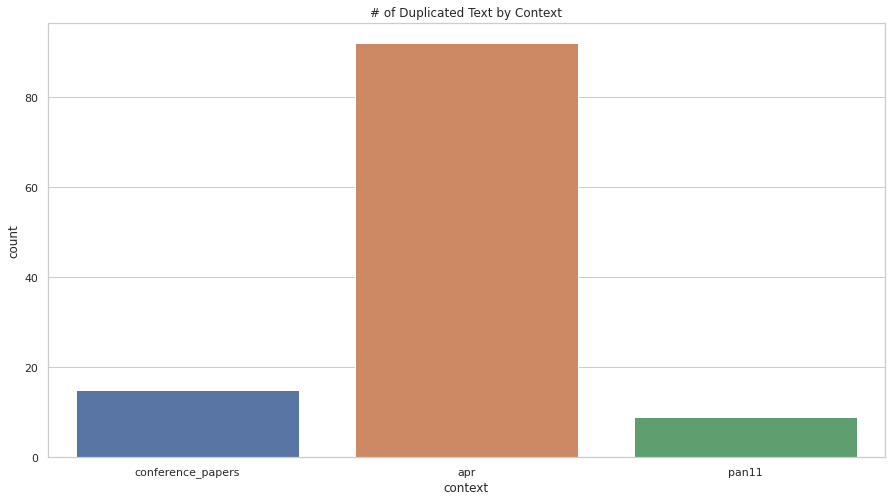

In [14]:
plt.figure(figsize=(15,8));
sns.countplot(x="context", data=duplicated_data);
plt.title("# of Duplicated Text by Context");

So on, we will select a random duplicated text so as to check which are the other column values for that text, since we need to make sure that just the text is duplicated for the same column values, because the same text may be written in the same language but tagged either as a wrong language or in a wrong source.

In [15]:
from random import choice

In [16]:
duplicated_text = duplicated_data.iloc[choice(range(len(duplicated_data)))]['text']
duplicated_text

"J'ai achete cet album par curiosite et pour les bons commentaires donnes sur ce site. Je suis vraiment decue: sur onze chansons de l'album, 4 sont vraiment sympa, le reste est plus que moyen... pas le coup de depenser vos 13 euros et quelques dans cet album...."

In [17]:
data[data['text'] == duplicated_text]

,lang,context,text
18217,fr,apr,J'ai achete cet album par curiosite et pour le...
18650,fr,apr,J'ai achete cet album par curiosite et pour le...


Anyway, we will just loop over all the duplicated texts in order to see if there is any unconsistency, which in this case means that the same text is duplicated but either comes from a different context or from a different language, in which case we will just drop both occurrences since the duplicated values seem to have no relevance towards the non-duplicated ones since the proportion of duplicated values is 218 out of 23128 samples, so in case of doubt, better drop them.

In [18]:
for index, row in duplicated_data.iterrows():
    duplicates = data[data['text'] == row['text']]
    
    lang = duplicates['lang'].unique().tolist()
    context = duplicates['context'].unique().tolist()
    
    if len(lang) > 1: print(f"\"{row[text]}\" duplicated in {' and '.join(lang)}")
    if len(context) > 1: print(f"\"{row[text]}\" duplicated in {' and '.join(context)}")

As we have already checked, the duplicate text values do not provide neither from different context nor from different languages, so we can just drop them all except the first occurrence which will remain unique after dropping the duplicates.

In [19]:
data.shape

(23128, 3)

In [20]:
data.drop_duplicates(subset=('text',), keep='first', inplace=True)
data.shape

(23012, 3)

Previously, we also spotted that the most frequent value (which means that it was also a duplicated one) was "translation not available", which has no meaning or relavance at all. But as we have already droped all the duplicates, we still need to get rid of the entry which contiains "translation not available" in its text field.

In [21]:
data = data[data['text'] != 'translation not available']
data.shape

(23011, 3)

---

## Exploratory Data Analysis

Before preprocessing the data we need to get to know the data, we will be achieving that by doing an Exploratory Data Analysis (EDA) in detail in order to extract some insights on the data.

During the EDA part we will be generating some useful plots using `matplotlib` and `seaborn` as already stated.

We will start by generating a Count Plot so as to see the data distribution along the different contexts and languages.

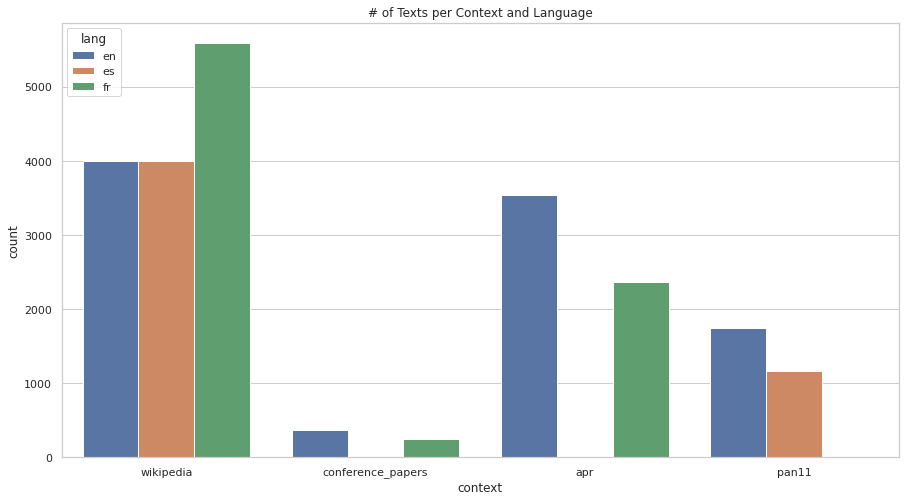

In [22]:
plt.figure(figsize=(15,8));
sns.countplot(x="context", hue="lang", data=data);
plt.title("# of Texts per Context and Language");

And, as we can see, the Wikipedia texts seem to be equally distributed per language, even though there are a lot of French (fr) texts in comparision to the amount of English (en) and Spanish (es) ones. Also, note that for the rest of context the amount of text is way lower than the Wikipedia's amount and that those are just applicable for 2 languages but not for 3, so even though the dataset is multi-lingual for French, English and Spanish, just the Wikipedia context is complete for every language, while the other ones are just bi-lingual.

We will also be generating a Box Plot of the text lenghts, since it is also an interesting feature to look at. So on, we will first need to calculate the text lenght of every text in the dataset and then generate the plot.

In [23]:
data['text_lenght'] = data['text'].str.len()
data.head()

,lang,context,text,text_lenght
0,en,wikipedia,Watchmen is a twelve-issue comic book limite...,76020
1,en,wikipedia,The Citigroup Center (formerly Citicorp Cente...,7206
2,en,wikipedia,| birth_place = | death_date = | death_place ...,1655
3,en,wikipedia,"Marbod or Maroboduus (born c. in 30 BC, died ...",3099
4,en,wikipedia,The Sylvester Medal is a bronze medal awarded ...,1674


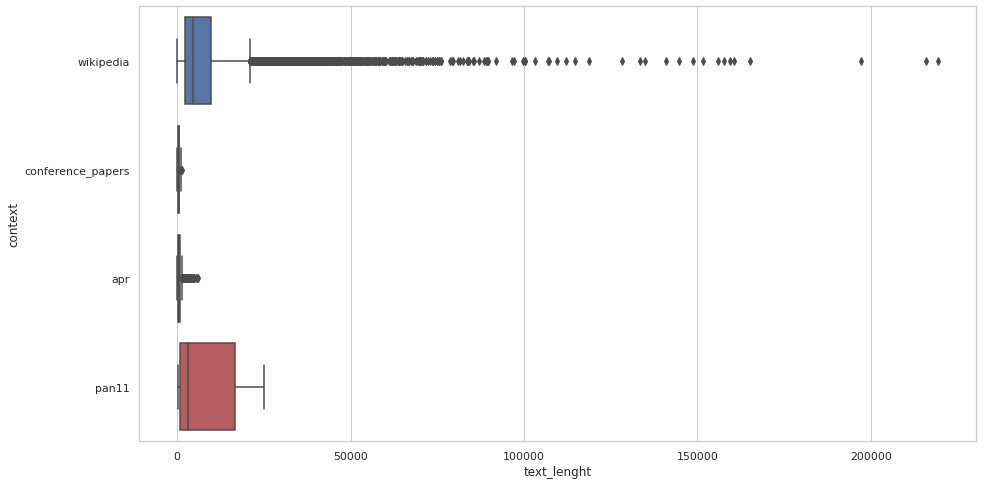

In [24]:
plt.figure(figsize=(15,8));
sns.boxplot(x="text_lenght", y="context", data=data);

In [25]:
import numpy as np

for context in data['context'].unique().tolist():
    print(f"{context}'s median text lenght: {round(np.median(data[data['context'] == context]['text_lenght']), 2)} characters.")

wikipedia's median text lenght: 4470.5 characters.
conference_papers's median text lenght: 440.0 characters.
apr's median text lenght: 420.0 characters.
pan11's median text lenght: 3232.0 characters.


So on, the previous plot tells that the Wikipedia context dataset is the most unstable one when it comes to text lenght since it has more or less a median lenght of 8505.63 characters, but it also contains a lot of outliers, which are indeed some texts which have a bigger lenght that the rest of the texts in the dataset. While, the other contexts are more equally distributed, meaning that they contain less characters than the Wikipedia one.

This feature is relevant, since while creating the vectorized representation of each text in the dataset, the model should be able to tell that bigger texts usually tend to come from the Wikipedia context, since we will be feeding the model with Wikipedia texts which are part of the outliers previously identified.

Finally, we will also be generating the WordClouds grouped by context and language so as to get to know which are the most common/frequent words used accross all the text of each context on each language.

In order to generate this plots we will be using the Python library named [WordCloud](https://github.com/amueller/word_cloud).

In [26]:
from skimage.io import imread

ea_logo = imread('resources/ea_logo.jpg')
ea_logo.shape

(1200, 1200, 3)

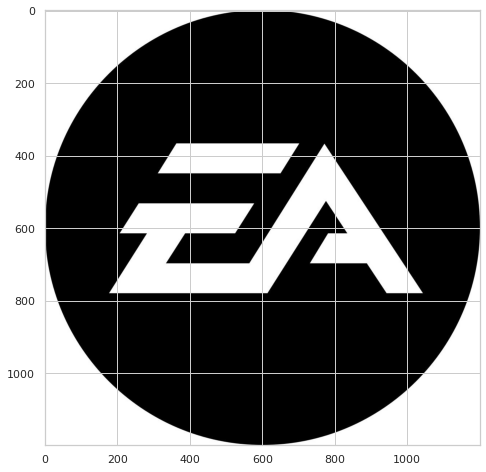

In [27]:
plt.figure(figsize=(8,8));
plt.imshow(ea_logo);

In [28]:
from wordcloud import WordCloud

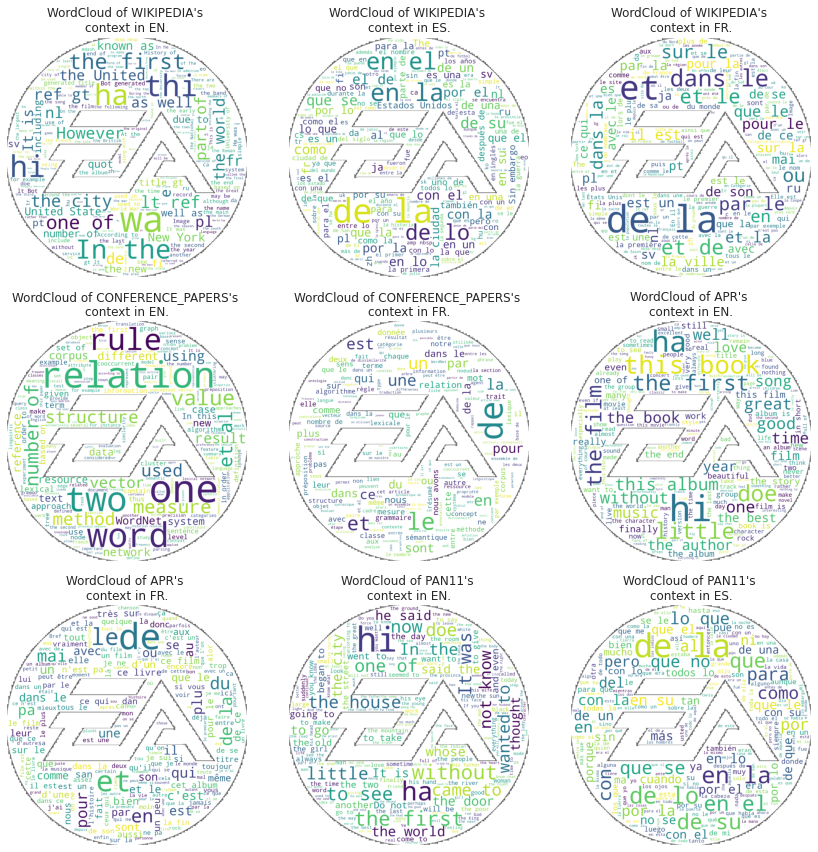

In [29]:
fig = plt.figure(figsize=(12,12));

idx = 0

for context in data['context'].unique().tolist():
    for lang in data[data['context'] == context]['lang'].unique().tolist():
        text = ' '.join(data[(data['context'] == context) & (data['lang'] == lang)]['text'].tolist())
        
        wordcloud = WordCloud(mask=ea_logo, background_color="white",
                              contour_width=.5, contour_color='black')
        wordcloud.generate(text)

        idx += 1

        plt.subplot(3, 3, idx);
        plt.title(f"WordCloud of {context.upper()}'s \ncontext in {lang.upper()}.");
        plt.imshow(wordcloud);
        plt.axis("off");

fig.tight_layout();

So on, a relevant feature we can extract from the generated WordClouds are the stopwords, since some words a too common for every context and language and they do not provide any useful content. Anyway, note that during the preprocessing part the stopwords will be removed and maybe some of the words that appear in the wordcloud are stopwords which will just be removed, but we are seeking to identify the most frequent and irrelevant words.

---

__Note__: all the research and EDA made here may be subject to changes/improvements whenever the NLP Preprocessing Pipeline is defined, so that the results may vary when analysing the preprocessed data instead of the raw one.